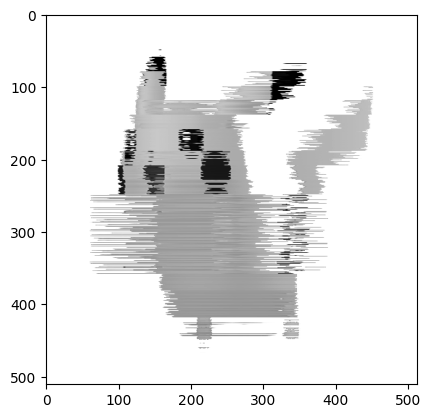

In [1]:
import pandas
from skimage import color
import matplotlib.pylab as plt
import csv

def cocktail_sort(arr, key=512):
    n = len(arr)
    swapped = True
    start = 0
    end = n - 1
    while swapped:
        swapped = False
        for i in range(start, end):
            if key is None:
                if arr[i] > arr[i + 1]:
                    arr[i], arr[i + 1] = arr[i + 1], arr[i]
                    swapped = True
            else:
                if key(arr[i]) > key(arr[i + 1]):
                    arr[i], arr[i + 1] = arr[i + 1], arr[i]
                    swapped = True
        if not swapped:
            break
        swapped = False
        end = end - 1
        for i in range(end - 1, start - 1, -1):
            if key is None:
                if arr[i] > arr[i + 1]:
                    arr[i], arr[i + 1] = arr[i + 1], arr[i]
                    swapped = True
            else:
                if key(arr[i]) > key(arr[i + 1]):
                    arr[i], arr[i + 1] = arr[i + 1], arr[i]
                    swapped = True
        start = start + 1

with open('Data_indeks_UTS.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader) # skip header row
    data = []
    for row in reader:
        data.append(row)

    cocktail_sort(data, key=lambda x: int(x[-1]))

with open('Hasil_Urut_Index_UTS.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header)
    for row in data:
        writer.writerow(row)
        
df = pandas.read_csv('Hasil_Urut_Index_UTS.csv')
df.drop(columns=['indeks'])
plt.imshow(df, cmap=plt.cm.gray, vmin=0, vmax=1)
plt.show()
